We will use `matplotlib.pyplot` for plotting and scipy's netcdf package for reading the model output. The `%pylab inline` causes figures to appear in the page and conveniently alias pyplot to `plt` (which is becoming a widely used alias).

This analysis assumes you changed `DAYMAX` to some multiple of 5 so that there are multiple time records in the model output.

To see this notebook with figures, see https://gist.github.com/adcroft/2a2b91d66625fd534372.

In [2]:
%pylab inline
import scipy.io.netcdf

Populating the interactive namespace from numpy and matplotlib


We first create a netcdf object, or "handle", to the netcdf file. We'll also list all the objects in the netcdf object.

In [3]:
high_res_file = scipy.io.netcdf_file('high/prog__0001_006.nc')
med_res_file = scipy.io.netcdf_file('med/prog__0001_006.nc')
low_res_file = scipy.io.netcdf_file('low/prog__0001_006.nc')
low_res_file.variables

OrderedDict([('xq', <scipy.io.netcdf.netcdf_variable at 0x12226c710>),
             ('yh', <scipy.io.netcdf.netcdf_variable at 0x12226c6d8>),
             ('zl', <scipy.io.netcdf.netcdf_variable at 0x12226c828>),
             ('Time', <scipy.io.netcdf.netcdf_variable at 0x12226ca90>),
             ('xh', <scipy.io.netcdf.netcdf_variable at 0x12226ca58>),
             ('yq', <scipy.io.netcdf.netcdf_variable at 0x12226cba8>),
             ('zi', <scipy.io.netcdf.netcdf_variable at 0x12226ccc0>),
             ('u', <scipy.io.netcdf.netcdf_variable at 0x12226cdd8>),
             ('v', <scipy.io.netcdf.netcdf_variable at 0x12226ce48>),
             ('h', <scipy.io.netcdf.netcdf_variable at 0x12226cef0>),
             ('e', <scipy.io.netcdf.netcdf_variable at 0x12226cf60>)])

Now we will create a variable object for the "e" variable in the file. Again, I'm labelling it as a handle to distinguish it from a numpy array or raw data.

We'll also look at an "attribute" and print the shape of the data.

In [4]:
high_e = high_res_file.variables['e']
med_e = med_res_file.variables['e']
low_e = low_res_file.variables['e']


"e" is 4-dimensional. netcdf files and objects are index [n,k,j,i] for the time-, vertical-, meridional-, zonal-axes.

Let's take a quick look at the first record [n=0] of the top interface [k=0]. 

AttributeError: 'QuadMesh' object has no attribute 'show'

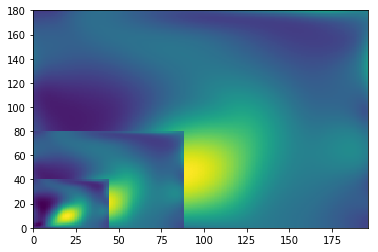

In [35]:
high = plt.pcolormesh( high_e[0,0] )
med = plt.pcolormesh( med_e[0,0] )
low = plt.pcolormesh( low_e[0,0] )



The data looks OKish. No scale! And see that "`<matplotlib...>`" line? That's a handle returned by the matplotlib function. Hide it with a semicolon. Let's add a scale and change the colormap.

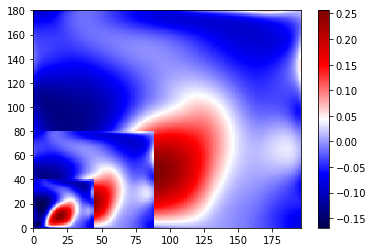

In [8]:
plt.pcolormesh( high_e[0,0], cmap=cm.seismic ); plt.colorbar();
plt.pcolormesh( med_e[0,0], cmap=cm.seismic ); 
plt.pcolormesh( low_e[0,0], cmap=cm.seismic );

We have 4D data but can only visualize by projecting on a 2D medium (the page). Let's solve that by going interactive!

In [11]:
import ipywidgets

We'll need to know the range to fix the color scale...

In [12]:
[high_e[:,0].min(), high_e[:,0].max()]
[med_e[:,0].min(), med_e[:,0].max()]
[low_e[:,0].min(), low_e[:,0].max()]

[-0.17451914, 0.34285635]

We define a simple function that takes the record number as an argument and then plots the top interface (k=0) for that record. We then use the `interact()` function to do some magic!

In [33]:
def plot_ssh(record):
    plt.pcolormesh( high_e[record,0], cmap=cm.nipy_spectral )
    plt.pcolormesh( med_e[record,0], cmap=cm.nipy_spectral )
    plt.pcolormesh( low_e[record,0], cmap=cm.nipy_spectral )
    plt.clim(-.5,.8) # Fixed scale here
    plt.colorbar()

ipywidgets.interact(plot_ssh, record=(0,high_e.shape[0]-1,1));


interactive(children=(IntSlider(value=0, description='record', max=1), Output()), _dom_classes=('widget-intera…

Unable to scroll the slider steadily enough? We'll use a loop to redraw for us...

In [20]:
from IPython import display

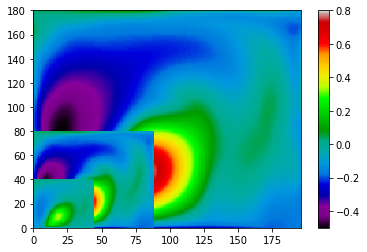

In [49]:
for n in range(high_e.shape[0]):
    display.display(plt.gcf())
    plt.clf()
    plot_ssh(n)
    display.clear_output(wait=True)
    


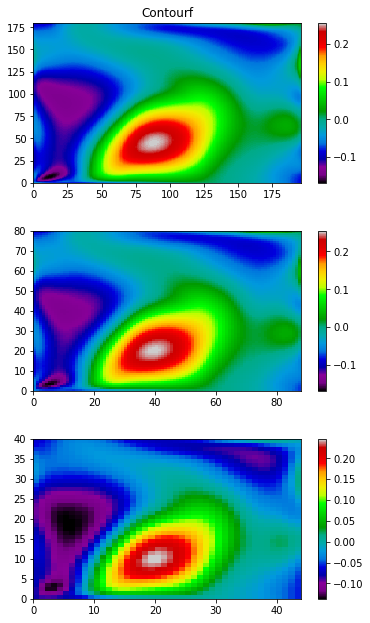

In [103]:

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3)

# adjust figures for viewing purposes
fig.subplots_adjust(hspace=.3, bottom=8, top=10)


# High resolution
high_cf = ax0.pcolormesh(high_e[0,0], cmap=cm.nipy_spectral)
fig.colorbar(high_cf, ax=ax0)
ax0.set_title('Contourf')
ax0.margins(x=.5, y=.5)


# medium resolution
med_cf = ax1.pcolormesh(med_e[0,0], cmap=cm.nipy_spectral)
fig.colorbar(med_cf, ax=ax1)

# Low resolution
low_cf = ax2.pcolormesh(low_e[0,0], cmap=cm.nipy_spectral)
fig.colorbar(low_cf, ax=ax2)


plt.show()

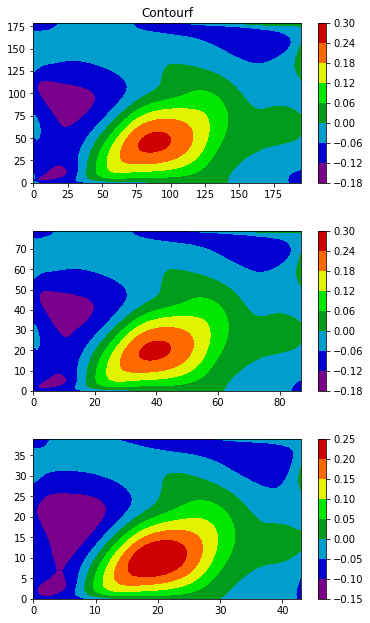

In [104]:

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3)

# adjust figures for viewing purposes
fig.subplots_adjust(hspace=.3, bottom=8, top=10)


# High resolution
high_cf = ax0.contourf(high_e[0,0], cmap=cm.nipy_spectral)
fig.colorbar(high_cf, ax=ax0)
ax0.set_title('Contourf')
ax0.margins(x=.5, y=.5)


# medium resolution
med_cf = ax1.contourf(med_e[0,0], cmap=cm.nipy_spectral)
fig.colorbar(med_cf, ax=ax1)

# Low resolution
low_cf = ax2.contourf(low_e[0,0], cmap=cm.nipy_spectral)
fig.colorbar(low_cf, ax=ax2)


plt.show()